In [ ]:
# default_exp module19

# Import

In [ ]:
# export
import numpy as np
import matplotlib.pyplot as plt

from cs371.utils import *

# Priority Queue

In [ ]:
class Heap:
    def __init__(self):
        self._entries = []

    def _i_parent(self, i):  return (i-1) // 2
    def _i_child_L(self, i): return 2*i + 1
    def _i_child_R(self, i): return 2*i + 2

    def _swap(self, i1, i2): 
        self._entries[i1], self._entries[i2] = self._entries[i2], self._entries[i1]

    def _i_children(self, i):
        i_L = self._i_child_L(i)
        return range(i_L, min(i_L+2, len(self._entries)))

    def _downheap(self):
        i_parent, i_children = 0, self._i_children(0)
        while i_children:
            val_parent = self._entries[i_parent]
            if len(i_children) == 2:
                if self._entries[i_children[0]] > self._entries[i_children[1]]:
                    i_child_max = i_children[0]
                else:                     
                    i_child_max = i_children[1]
            else:
                i_child_max = i_children[0]
            val_child_max = self._entries[i_child_max]
            if val_parent < val_child_max: self._swap(i_parent, i_child_max)
            else:                          break
            i_parent, i_children = i_child_max, self._i_children(i_child_max)

    def pop_max(self):
        val_max = None
        if self._entries:
            val_max  = self._entries[0]
            val_last = self._entries.pop()
            if self._entries:
                self._entries[0] = val_last
                self._downheap()
        return val_max

    def _upheap(self):
        i_child, i_parent = len(self._entries)-1, self._i_parent(len(self._entries)-1)
        while i_parent >= 0:
            val_parent, val_child = self._entries[i_parent], self._entries[i_child]
            if val_parent < val_child: self._swap(i_parent, i_child)
            else:                      break
            i_parent, i_child = self._i_parent(i_parent), i_parent

    def add(self, val):
        self._entries.append(val)
        self._upheap()

In [ ]:
heap = Heap()
for i in [7, 1, 2, 36, 3, 17, 100, 19, 25]: heap.add(i)
while val := heap.pop_max(): print(val)

100
36
25
19
17
7
3
2
1


Refactor a little bit

In [ ]:
class Heap2:
    def __init__(self, entries=None):
        if entries is None: entries = []
        self._entries = entries
        if entries:
            self._heapify()

    def _i_parent(self, i):  return (i-1) // 2
    def _i_child_L(self, i): return 2*i + 1
    def _i_child_R(self, i): return 2*i + 2

    def _swap(self, i1, i2): 
        self._entries[i1], self._entries[i2] = self._entries[i2], self._entries[i1]

    def _i_children(self, i):
        i_L = self._i_child_L(i)
        return range(i_L, min(i_L+2, len(self._entries)))

    def _downheap(self, i_parent):
        i_children = self._i_children(i_parent)
        if i_children:
            i_child_max = max(i_children, key=lambda i: self._entries[i])
            val_parent, val_child_max = self._entries[i_parent], self._entries[i_child_max]
            if val_parent < val_child_max: 
                self._swap(i_parent, i_child_max)
                self._downheap(i_child_max)

    def pop_max(self):
        val_max = None
        if self._entries:
            val_max, val_last = self._entries[0], self._entries.pop()
            if self._entries:
                self._entries[0] = val_last
                self._downheap(0)
        return val_max

    def _upheap(self, i_child):
        i_parent = self._i_parent(i_child)
        if i_parent >= 0:
            val_parent, val_child = self._entries[i_parent], self._entries[i_child]
            if val_parent < val_child: 
                self._swap(i_parent, i_child)
                self._upheap(i_parent)

    def add(self, val):
        self._entries.append(val)
        self._upheap(len(self._entries)-1)
        
    def _heapify(self):
        for i in reversed(range(len(self._entries))):
            self._downheap(i)

In [ ]:
heap = Heap2()
for i in [7, 1, 2, 36, 3, 17, 100, 19, 25]: heap.add(i)
while val := heap.pop_max(): print(val)

100
36
25
19
17
7
3
2
1


Try initializing with heapify

In [ ]:
heap = Heap2([7, 1, 2, 36, 3, 17, 100, 19, 25])
while val := heap.pop_max(): print(val)

100
36
25
19
17
7
3
2
1


Add key/value store

In [ ]:
class Heap3:
    def __init__(self, entries=None):
        if entries is None: entries = []
        self._entries = entries
        if entries:
            self._heapify()

    def _i_parent(self, i):  return (i-1) // 2
    def _i_child_L(self, i): return 2*i + 1
    def _i_child_R(self, i): return 2*i + 2

    def _swap(self, i1, i2): 
        self._entries[i1], self._entries[i2] = self._entries[i2], self._entries[i1]

    def _i_children(self, i):
        i_L = self._i_child_L(i)
        return range(i_L, min(i_L+2, len(self._entries)))

    def _downheap(self, i_parent):
        i_children = self._i_children(i_parent)
        if i_children:
            i_child_max = max(i_children, key=lambda i: self._entries[i][0])
            key_parent, key_child_max = self._entries[i_parent][0], self._entries[i_child_max][0]
            if key_parent < key_child_max: 
                self._swap(i_parent, i_child_max)
                self._downheap(i_child_max)

    def pop_max(self):
        val_max = None
        if self._entries:
            val_max, val_last = self._entries[0], self._entries.pop()
            if self._entries:
                self._entries[0] = val_last
                self._downheap(0)
        return val_max

    def _upheap(self, i_child):
        i_parent = self._i_parent(i_child)
        if i_parent >= 0:
            key_parent, key_child = self._entries[i_parent][0], self._entries[i_child][0]
            if key_parent < key_child: 
                self._swap(i_parent, i_child)
                self._upheap(i_parent)

    def add(self, val):
        self._entries.append(val)
        self._upheap(len(self._entries)-1)
        
    def _heapify(self):
        for i in reversed(range(len(self._entries))):
            self._downheap(i)

In [ ]:
heap = Heap3()
for i in [7, 1, 2, 36, 3, 17, 100, 19, 25]: heap.add((i, f'value for {i}'))
while val := heap.pop_max(): print(val)

(100, 'value for 100')
(36, 'value for 36')
(25, 'value for 25')
(19, 'value for 19')
(17, 'value for 17')
(7, 'value for 7')
(3, 'value for 3')
(2, 'value for 2')
(1, 'value for 1')


Try plotting as tree

In [ ]:
from cs371.module17 import BinaryTree, TreeNode

In [ ]:
heap = Heap3()
for i in [7, 1, 2, 36, 3, 17, 100, 19, 25]: heap.add((i, f'value for {i}'))

In [ ]:
def _tree_heap(self, i, heap):
    self = TreeNode(heap._entries[i][0], heap._entries[i][1])
    i_L = heap._i_child_L(i) 
    if i_L < len(heap._entries):
        self.L = self._tree_heap(i_L, heap)
    i_R = heap._i_child_R(i) 
    if i_R < len(heap._entries):
        self.R = self._tree_heap(i_R, heap)
    return self

In [ ]:
TreeNode._tree_heap = _tree_heap

In [ ]:
tree = BinaryTree()
tree.root = TreeNode(None, None)
tree.root = tree.root._tree_heap(0, heap)

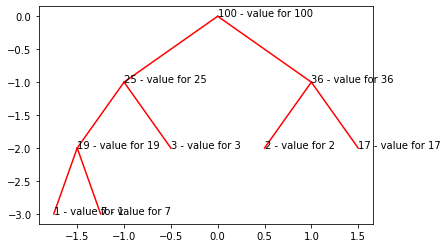

In [ ]:
tree.draw()

In [ ]:
nodes = [TreeNode(val[0], val[1]) for val in heap._entries]
nodes

[100 - value for 100,
 25 - value for 25,
 36 - value for 36,
 19 - value for 19,
 3 - value for 3,
 2 - value for 2,
 17 - value for 17,
 1 - value for 1,
 7 - value for 7]

In [ ]:
def _make_heap_tree(i):
    i_L = heap._i_child_L(i)
    if i_L < len(nodes):
        nodes[i].L = nodes[i_L]
        _make_heap_tree(i_L)
    i_R = heap._i_child_R(i)
    if i_R < len(nodes):
        nodes[i].R = nodes[i_R]
        _make_heap_tree(i_R)        

In [ ]:
tree = BinaryTree()
tree.root = nodes[0]

In [ ]:
_make_heap_tree(0)

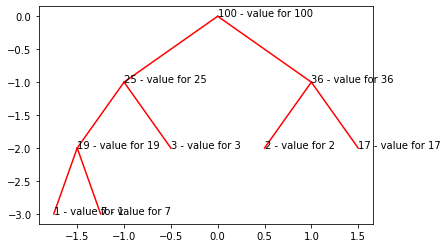

In [ ]:
tree.draw()

Binary Codebook Trees

In [ ]:
from collections import deque

In [ ]:
chars = [chr(i) for i in range(97, 123)] + [' ']

In [ ]:
d = deque([TreeNode(c,c) for c in chars])
d

deque([a - a,
       b - b,
       c - c,
       d - d,
       e - e,
       f - f,
       g - g,
       h - h,
       i - i,
       j - j,
       k - k,
       l - l,
       m - m,
       n - n,
       o - o,
       p - p,
       q - q,
       r - r,
       s - s,
       t - t,
       u - u,
       v - v,
       w - w,
       x - x,
       y - y,
       z - z,
         -  ])

In [ ]:
while len(d) > 1:
    node_L = d.popleft()
    node_R = d.popleft()
    parent = TreeNode(node_L.val + node_R.val, node_L.val + node_R.val)
    parent.L = node_L
    parent.R = node_R
    d.append(parent)

In [ ]:
root = d.pop()

In [ ]:
tree = BinaryTree()

In [ ]:
tree.root = root

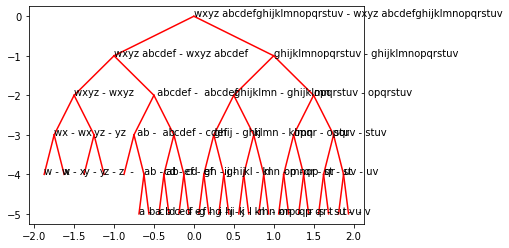

In [ ]:
tree.draw()

In [ ]:
def _encode(self, char):
    if not (self.L and self.R): 
        return ''
    elif self.L and char in self.L.val:
        return '0' + self.L._encode(char)
    else:
        return '1' + self.R._encode(char)

In [ ]:
TreeNode._encode = _encode

In [ ]:
string = 'justin is cool'

In [ ]:
encoding = ''.join([tree.root._encode(char) for char in string])
encoding

'10011111101110011101100101011101001001011100010001100110001100010101'

In [ ]:
string = 'eat'

In [ ]:
encoding = ''.join([tree.root._encode(char) for char in string])
encoding

'011100101011101'

In [ ]:
def _decode(self, encoding, i):
    if not (self.L and self.R): 
        return self.val, i
    elif encoding[i] == '0':
        return self.L._decode(encoding, i+1)
    else:
        return self.R._decode(encoding, i+1)

In [ ]:
TreeNode._decode = _decode

In [ ]:
string, i = '', 0
while i < len(encoding):
    char, i = tree.root._decode(encoding, i)
    string += char

In [ ]:
print(string)

eat


In [ ]:
def _build_codebook(self, codebook, binary=[]):
    if not (self.L and self.R):
        codebook[self.val] = ''.join(binary)
    else:
        if self.L:
            binary.append('0')
            self.L._build_codebook(codebook, binary)
            binary.pop()            
        if self.R:
            binary.append('1')
            self.R._build_codebook(codebook, binary)
            binary.pop() 

In [ ]:
TreeNode._build_codebook = _build_codebook

In [ ]:
codebook = {}
tree.root._build_codebook(codebook)

In [ ]:
codebook

{'w': '0000',
 'x': '0001',
 'y': '0010',
 'z': '0011',
 ' ': '0100',
 'a': '01010',
 'b': '01011',
 'c': '01100',
 'd': '01101',
 'e': '01110',
 'f': '01111',
 'g': '10000',
 'h': '10001',
 'i': '10010',
 'j': '10011',
 'k': '10100',
 'l': '10101',
 'm': '10110',
 'n': '10111',
 'o': '11000',
 'p': '11001',
 'q': '11010',
 'r': '11011',
 's': '11100',
 't': '11101',
 'u': '11110',
 'v': '11111'}

Use codebook to encode

Huffman tree

In [ ]:
with open('data/words.txt', "r") as f:
    # Get character histogram
    total_lines = [l.strip().split('\t')[0] for l in f.readlines()]
    total_chars = []
    for line in total_lines:
        total_chars += [c for c in line]
    chars, counts = np.unique(total_chars, return_counts=True)
    # Append space
    chars  = np.append(chars,  ' ')
    counts = np.append(counts, max(counts)+1)

<BarContainer object of 27 artists>

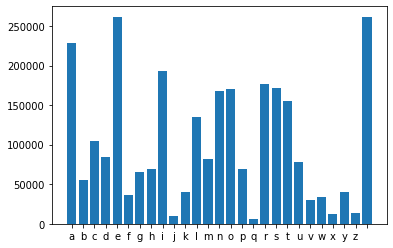

In [ ]:
plt.bar(chars, counts)

Use heap instead of deque to pull out nodes

In [ ]:
queue = Heap3()

I wrote a max heap so use negative counts to reverse the order

In [ ]:
for count, char in zip(counts, chars):
    node = TreeNode(char, char)
    queue.add((-count, node))

In [ ]:
while len(queue._entries) > 1:
    count_L, node_L = queue.pop_max()
    count_R, node_R = queue.pop_max()
    parent = TreeNode(node_L.val + node_R.val, node_L.val + node_R.val)
    parent.L = node_L
    parent.R = node_R
    queue.add((count_L + count_R, parent))

In [ ]:
count, root = queue.pop_max()

In [ ]:
tree = BinaryTree()

In [ ]:
tree.root = root

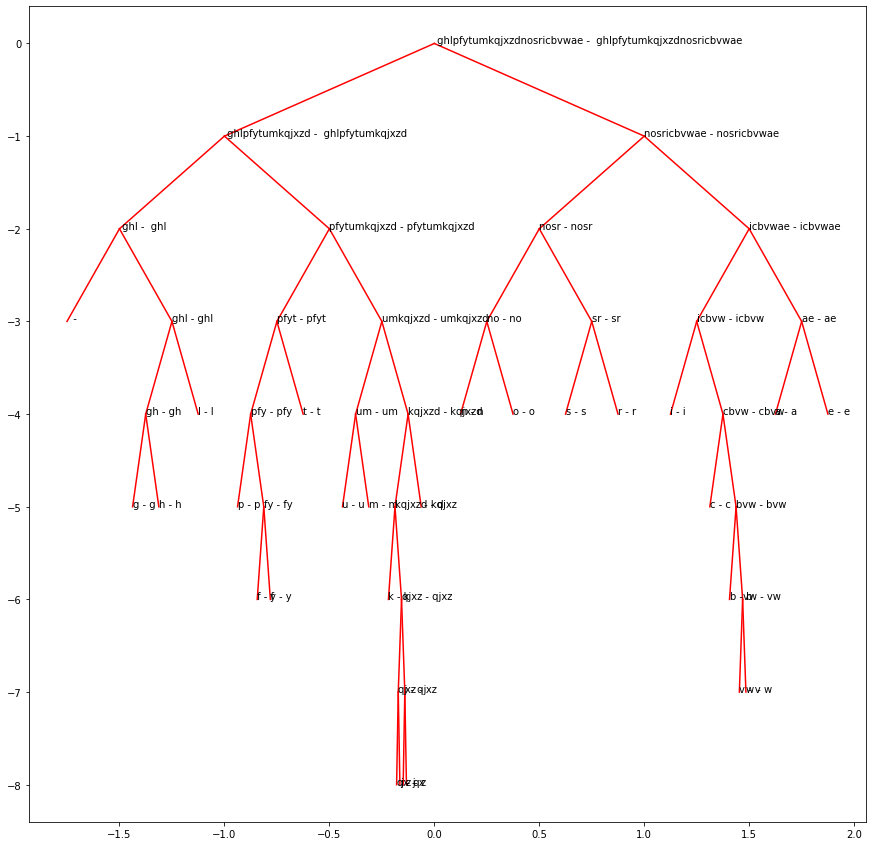

In [ ]:
plt.figure(figsize=(15, 15))
tree.draw()

In [ ]:
string = 'justin is cool'

In [ ]:
encoding = ''.join([tree.root._encode(char) for char in string])
encoding

'011101010110010100101110010000001100101000011010100110010011'

In [ ]:
string = 'eat'

In [ ]:
encoding = ''.join([tree.root._encode(char) for char in string])
encoding

'111111100101'

It's shorter than before

Try wikipedia article on huffman coding

In [ ]:
queue = Heap3()

I wrote a max heap so use negative counts to reverse the order

In [ ]:
for count, char in zip([15, 7, 6, 6, 5], ['a', 'b', 'c', 'd', 'e']):
    node = TreeNode(char, char)
    queue.add((-count, node))

In [ ]:
while len(queue._entries) > 1:
    count_L, node_L = queue.pop_max()
    count_R, node_R = queue.pop_max()
    parent = TreeNode(node_L.val + node_R.val, node_L.val + node_R.val)
    parent.L = node_L
    parent.R = node_R
    queue.add((count_L + count_R, parent))

In [ ]:
count, root = queue.pop_max()

In [ ]:
tree = BinaryTree()

In [ ]:
tree.root = root

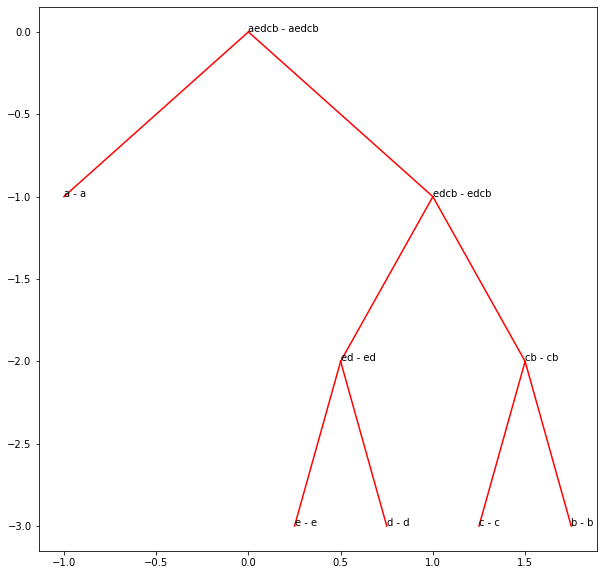

In [ ]:
plt.figure(figsize=(10, 10))
tree.draw()

In [ ]:
count

-39

Tree shape and count matches wiki article

In [ ]:
queue = Heap3()

In [ ]:
for count, char in zip([  7,  4,  4,  3,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1], 
                       [' ','a','e','f','h','i','m','n','s','t','l','o','p','r','u','x']):
    node = TreeNode(char, char)
    queue.add((-count, node))

In [ ]:
while len(queue._entries) > 1:
    count_L, node_L = queue.pop_max()
    count_R, node_R = queue.pop_max()
    parent = TreeNode(node_L.val + node_R.val, node_L.val + node_R.val)
    parent.L = node_L
    parent.R = node_R
    queue.add((count_L + count_R, parent))

In [ ]:
count, root = queue.pop_max()

In [ ]:
tree = BinaryTree()

In [ ]:
tree.root = root

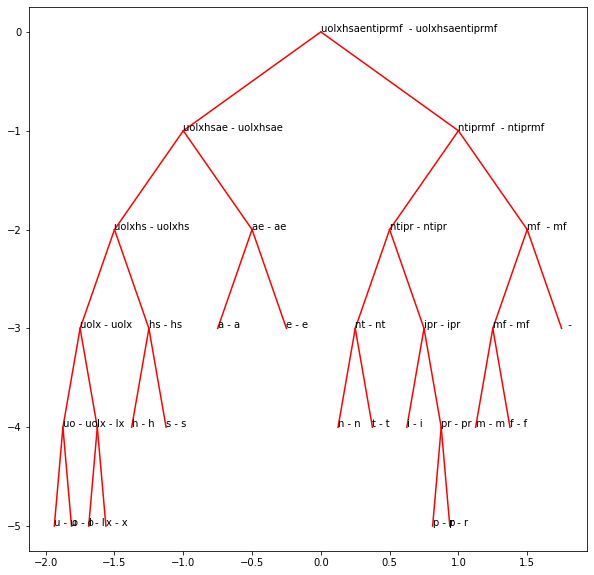

In [ ]:
plt.figure(figsize=(10, 10))
tree.draw()

In [ ]:
count

-36

Tree shape and count matches wiki article

# Build

In [ ]:
build_notebook()

<IPython.core.display.Javascript object>

Converted module19.ipynb.
